# COGS 108 - EDA Checkpoint

# Names

- Asher Av
- Quoc-Zuy Do
- Hector Gallo
- Jeremy Nurding
- Andres Villegas

<a id='research_question'></a>
# Research Question

Is there a statistically significant relationship between COVID-19 cases and air quality measures such as the levels of NO2 in the atmosphere and AQI (Air Quality Index) in San Diego county during the years 2020 and 2021?

# Setup

#### Import Modules

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### Import datasets

In [2]:
# nytimes daily covid dataset
covid_df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

# EPA 2016 NO2 dataset 
epa2016_df = pd.read_csv('https://raw.githubusercontent.com/asherbav/covid_pollution_files/main/epa2016.csv')

# EPA 2017 NO2 dataset 
epa2017_df = pd.read_csv('https://raw.githubusercontent.com/asherbav/covid_pollution_files/main/epa2017.csv')

# EPA 2018 NO2 dataset 
epa2018_df = pd.read_csv('https://raw.githubusercontent.com/asherbav/covid_pollution_files/main/epa2018.csv')

# EPA 2019 NO2 dataset 
epa2019_df = pd.read_csv('https://raw.githubusercontent.com/asherbav/covid_pollution_files/main/epa2019.csv')

# EPA 2020 NO2 dataset
epa2020_df = pd.read_csv('https://raw.githubusercontent.com/asherbav/covid_pollution_files/main/epa2020.csv')

# EPA 2021 NO2 dataset 
epa2021_df = pd.read_csv('https://raw.githubusercontent.com/asherbav/covid_pollution_files/main/epa2021.csv')


# Data Cleaning

---
### COVID-19 Dataset Cleaning
The first thing that we want to do is take a look at the original datasets to see what they look like. We first take a look at the COVID-19 Dataset titled: "COVID-19 Data - US Counties from NYTimes".

In [3]:
covid_df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
2248988,2022-02-24,Sweetwater,Wyoming,56037.0,10984,123.0
2248989,2022-02-24,Teton,Wyoming,56039.0,9760,16.0
2248990,2022-02-24,Uinta,Wyoming,56041.0,5612,36.0
2248991,2022-02-24,Washakie,Wyoming,56043.0,2332,43.0


We then want to check if there are any null-values that we might want to get rid of  using isnull().sum. We see that there are a bunch of null values inside of the death's columns and the FIPS column. 

In [4]:
covid_df.isnull().sum()

date          0
county        0
state         0
fips      20923
cases         0
deaths    51521
dtype: int64

However, we do not need either of these columns for our analysis. Our group is trying to investigate the relationship between COVID-19  cases in San Diego county and the levels of NO<sub>2</sub>  in the atmosphere. This being said, the number of deaths over this period will not be necesssary for our analysis. In addition since our scope is being narrowed to only look at San Diego county, we do not need the FIPS geographic identifiers or the state column.

In [5]:
col_drop = ['deaths', 'fips', 'state']

covid_df = covid_df.drop(col_drop, axis = 1)
covid_df = covid_df.dropna()


Now we will sort the data to only look at San Diego County to narrow our geographical scope, then we can remove the column entirely because we know all the remaining data will be for San Diego county.

In [6]:
covid_df_sd = covid_df[covid_df['county'] == 'San Diego']
covid_df_sd = covid_df_sd.drop(['county'], axis = 1)

At this point we are done cleaning the COVID-19 dataset. We run isnull() again to double check that all the NULL/NaN values have been removed from out dataset properly.

In [7]:
covid_df_sd.isnull().sum()

date     0
cases    0
dtype: int64

At this point the COVID-19 data set is in a state we can use for our analysis.

In [8]:
covid_df_sd

,date,cases
118,2020-02-10,1
128,2020-02-11,1
138,2020-02-12,1
149,2020-02-13,1
160,2020-02-14,1
...,...,...
2232958,2022-02-20,777194
2236209,2022-02-21,777194
2239460,2022-02-22,779943
2242712,2022-02-23,782181


---
### EPA 2020 Air Quality Data Set Cleaning
We will repeat the steps for the COVID dataset from above for the dataset titled "EPA 2020 Air Quality" and "EPA 2021 Air Quality". We display the dataset to get an idea of what it looks like, search for any NULL/NaN values, and then also check the types of all the objects to make sure if everything is in order.

In [9]:
epa2020_df

,Date,Source,Site ID,POC,Daily Max 1-hour NO2 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2020,AQS,60730001,1,18,ppb,17,Chula Vista,22,92.0,42602,Nitrogen dioxide (NO2),41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088
1,01/02/2020,AQS,60730001,1,35,ppb,33,Chula Vista,22,92.0,42602,Nitrogen dioxide (NO2),41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088
2,01/03/2020,AQS,60730001,1,36,ppb,34,Chula Vista,22,92.0,42602,Nitrogen dioxide (NO2),41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088
3,01/04/2020,AQS,60730001,1,31,ppb,29,Chula Vista,22,92.0,42602,Nitrogen dioxide (NO2),41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088
4,01/05/2020,AQS,60730001,1,36,ppb,34,Chula Vista,22,92.0,42602,Nitrogen dioxide (NO2),41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.631242,-117.059088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,12/27/2020,AQS,60731026,1,11,ppb,10,San Diego - Sherman Elementary School,22,92.0,42602,Nitrogen dioxide (NO2),41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.710177,-117.142665
2865,12/28/2020,AQS,60731026,1,12,ppb,11,San Diego - Sherman Elementary School,22,92.0,42602,Nitrogen dioxide (NO2),41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.710177,-117.142665
2866,12/29/2020,AQS,60731026,1,29,ppb,27,San Diego - Sherman Elementary School,22,92.0,42602,Nitrogen dioxide (NO2),41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.710177,-117.142665
2867,12/30/2020,AQS,60731026,1,31,ppb,29,San Diego - Sherman Elementary School,20,83.0,42602,Nitrogen dioxide (NO2),41740,"San Diego-Carlsbad, CA",6,California,73,San Diego,32.710177,-117.142665


In [10]:
epa2020_df.isnull().sum()

Date                                  0
Source                                0
Site ID                               0
POC                                   0
Daily Max 1-hour NO2 Concentration    0
UNITS                                 0
DAILY_AQI_VALUE                       0
Site Name                             0
DAILY_OBS_COUNT                       0
PERCENT_COMPLETE                      0
AQS_PARAMETER_CODE                    0
AQS_PARAMETER_DESC                    0
CBSA_CODE                             0
CBSA_NAME                             0
STATE_CODE                            0
STATE                                 0
COUNTY_CODE                           0
COUNTY                                0
SITE_LATITUDE                         0
SITE_LONGITUDE                        0
dtype: int64

Since there are no null values present, we will not be excluding any rows. 

In [11]:
epa2020_df.dtypes

Date                                   object
Source                                 object
Site ID                                 int64
POC                                     int64
Daily Max 1-hour NO2 Concentration      int64
UNITS                                  object
DAILY_AQI_VALUE                         int64
Site Name                              object
DAILY_OBS_COUNT                         int64
PERCENT_COMPLETE                      float64
AQS_PARAMETER_CODE                      int64
AQS_PARAMETER_DESC                     object
CBSA_CODE                               int64
CBSA_NAME                              object
STATE_CODE                              int64
STATE                                  object
COUNTY_CODE                             int64
COUNTY                                 object
SITE_LATITUDE                         float64
SITE_LONGITUDE                        float64
dtype: object

Since the date column does not store datetime objects, we will need to convert the Date to datetime objects. 

A majority of the columns will not be used for our analysis:
1) After looking at each column for their unique values, we noticed that we can safely drop the 'COUNTY', 'COUNTY_CODE','STATE','STATE_CODE','CBSA_NAME','CBSA_CODE','AQS_PARAMETER_DESC','AQS_PARAMETER_CODE','UNITS',and 'Source' columns as there is only a single value representing the entire column. To elaborate, the values representing the columns are 'San Diego' for the county and county code, 'San Diego-Carlsbad, CA' for the CBSA, 'NO<sub>2</sub>' for the air quality parameter, ppb or parts per billion for the unit, 'AQS' for the source. 

2) Furthermore the values 'SITE_LATITUDE','SITE_LONGITUDE','Site ID','POC','PERCENT_COMPLETE', and'DAILY_OBS_COUNT' are not going to be used for the analysis that we will be peforming. 

In short, the columns that we're interested in are the date, the NO<sub>2</sub> levels, the AQI(Air Quality Index), and the particular sites. 
An additional task we have is to re-name multi-word labels to be concise. 


In [12]:
same_value_list = ['COUNTY', 'COUNTY_CODE','STATE','STATE_CODE','CBSA_NAME','CBSA_CODE','AQS_PARAMETER_DESC','AQS_PARAMETER_CODE','UNITS','Source']
not_used_list = ['SITE_LATITUDE','SITE_LONGITUDE','Site ID','POC','PERCENT_COMPLETE','DAILY_OBS_COUNT']
updated_labels = {'Daily Max 1-hour NO2 Concentration': 'NO2', 'DAILY_AQI_VALUE': 'AQI', 'Site Name': 'Site'}

In [13]:
# Drop columns that contain only a single value
epa2020_df = epa2020_df.drop(same_value_list, axis = 1)

# Drop columns that are not going to be used
epa2020_df = epa2020_df.drop(not_used_list, axis = 1)

# Rename columns
epa2020_df = epa2020_df.rename(columns=updated_labels)

# Convert date to datetime object
epa2020_df['Date'] = pd.to_datetime(epa2020_df['Date'])

At this point the EPA 2020 Air Quality dataset is in a state we can use for our analysis. All of the other EPA datasets for different years follow an identical format, we will now proceed to repeat the above steps to clean the rest of the data. 

In [14]:
epa2020_df

,Date,NO2,AQI,Site
0,2020-01-01,18,17,Chula Vista
1,2020-01-02,35,33,Chula Vista
2,2020-01-03,36,34,Chula Vista
3,2020-01-04,31,29,Chula Vista
4,2020-01-05,36,34,Chula Vista
...,...,...,...,...
2864,2020-12-27,11,10,San Diego - Sherman Elementary School
2865,2020-12-28,12,11,San Diego - Sherman Elementary School
2866,2020-12-29,29,27,San Diego - Sherman Elementary School
2867,2020-12-30,31,29,San Diego - Sherman Elementary School


In [15]:
# Clean Data for 2016
# Drop columns that contain only a single value
epa2016_df = epa2016_df.drop(same_value_list, axis = 1)

# Drop columns that are not going to be used
epa2016_df = epa2016_df.drop(not_used_list, axis = 1)

# Rename columns
epa2016_df = epa2016_df.rename(columns=updated_labels)

# Convert date to datetime object
epa2016_df['Date'] = pd.to_datetime(epa2016_df['Date'])

epa2016_df

,Date,NO2,AQI,Site
0,2016-01-01,30,28,Chula Vista
1,2016-01-02,40,38,Chula Vista
2,2016-01-03,36,34,Chula Vista
3,2016-01-04,17,16,Chula Vista
4,2016-01-05,21,20,Chula Vista
...,...,...,...,...
2707,2016-12-25,22,21,El Cajon - Lexington Elementary School
2708,2016-12-26,26,25,El Cajon - Lexington Elementary School
2709,2016-12-29,32,30,El Cajon - Lexington Elementary School
2710,2016-12-30,24,23,El Cajon - Lexington Elementary School


In [16]:
#Clean Data for 2017
# Drop columns that contain only a single value
epa2017_df = epa2017_df.drop(same_value_list, axis = 1)

# Drop columns that are not going to be used
epa2017_df = epa2017_df.drop(not_used_list, axis = 1)

# Rename columns
epa2017_df = epa2017_df.rename(columns=updated_labels)

# Convert date to datetime object
epa2017_df['Date'] = pd.to_datetime(epa2017_df['Date'])

epa2017_df 

,Date,NO2,AQI,Site
0,2017-01-01,20,19,Chula Vista
1,2017-01-02,22,21,Chula Vista
2,2017-01-03,26,25,Chula Vista
3,2017-01-04,25,24,Chula Vista
4,2017-01-05,27,25,Chula Vista
...,...,...,...,...
2386,2017-12-27,35,33,El Cajon - Lexington Elementary School
2387,2017-12-28,41,39,El Cajon - Lexington Elementary School
2388,2017-12-29,43,41,El Cajon - Lexington Elementary School
2389,2017-12-30,39,37,El Cajon - Lexington Elementary School


In [17]:
#Clean Data for 2018
# Drop columns that contain only a single value
epa2018_df = epa2018_df.drop(same_value_list, axis = 1)

# Drop columns that are not going to be used
epa2018_df = epa2018_df.drop(not_used_list, axis = 1)

# Rename columns
epa2018_df = epa2018_df.rename(columns=updated_labels)

# Convert date to datetime object
epa2018_df['Date'] = pd.to_datetime(epa2018_df['Date'])

epa2018_df 

,Date,NO2,AQI,Site
0,2018-01-01,27,25,Chula Vista
1,2018-01-02,40,38,Chula Vista
2,2018-01-03,32,30,Chula Vista
3,2018-01-04,52,49,Chula Vista
4,2018-01-05,39,37,Chula Vista
...,...,...,...,...
2431,2018-12-27,21,20,El Cajon - Lexington Elementary School
2432,2018-12-28,25,24,El Cajon - Lexington Elementary School
2433,2018-12-29,27,25,El Cajon - Lexington Elementary School
2434,2018-12-30,20,19,El Cajon - Lexington Elementary School


In [18]:
#Clean Data for 2019
# Drop columns that contain only a single value
epa2019_df = epa2019_df.drop(same_value_list, axis = 1)

# Drop columns that are not going to be used
epa2019_df = epa2019_df.drop(not_used_list, axis = 1)

# Rename columns
epa2019_df = epa2019_df.rename(columns=updated_labels)

# Convert date to datetime object
epa2019_df['Date'] = pd.to_datetime(epa2019_df['Date'])

epa2019_df 

,Date,NO2,AQI,Site
0,2019-01-01,17,16,Chula Vista
1,2019-01-02,35,33,Chula Vista
2,2019-01-03,39,37,Chula Vista
3,2019-01-04,36,34,Chula Vista
4,2019-01-05,31,29,Chula Vista
...,...,...,...,...
2556,2019-12-27,33,31,San Diego - Sherman Elementary School
2557,2019-12-28,31,29,San Diego - Sherman Elementary School
2558,2019-12-29,33,31,San Diego - Sherman Elementary School
2559,2019-12-30,34,32,San Diego - Sherman Elementary School


In [19]:
#Clean Data for 2021
# Drop columns that contain only a single value
epa2021_df = epa2021_df.drop(same_value_list, axis = 1)

# Drop columns that are not going to be used
epa2021_df = epa2021_df.drop(not_used_list, axis = 1)

# Rename columns
epa2021_df = epa2021_df.rename(columns=updated_labels)

# Convert date to datetime object
epa2021_df['Date'] = pd.to_datetime(epa2021_df['Date'])

epa2021_df

,Date,NO2,AQI,Site
0,2021-01-01,32,30,Chula Vista
1,2021-01-02,32,30,Chula Vista
2,2021-01-03,22,21,Chula Vista
3,2021-01-04,27,25,Chula Vista
4,2021-01-05,29,27,Chula Vista
...,...,...,...,...
2006,2021-08-27,12,11,San Diego - Sherman Elementary School
2007,2021-08-28,9,8,San Diego - Sherman Elementary School
2008,2021-08-29,10,9,San Diego - Sherman Elementary School
2009,2021-08-30,14,13,San Diego - Sherman Elementary School


# Data Analysis & Results (EDA)

Before we dive deeper into our  analysis regarding any potential relationship between COVID-19 cases and the levels of NO<sub>2</sub> levels within the atmosphere in San Diego county, we need to make sure that the air quality data that we have is suitable for our needs, which means that we will need to determine if we can aggregate the values read by different measuring stations in San Diego county into a single measurement for the whole county, which we can then analyze as a trend over time. In order to determine whether air qualiities measures can be aggregated from the site level data to the county level we wil lneed to determine whether changes experineced in the data are similar across sites. If air quality measures appear to be similar, that is, there are no outliers among them and the measuring stations follow similar trends from   year to year, then we can reasonably aggregate the site data into a single mean value for the entire county. 

---
#### What measuring stations are we dealing with for our NO<sub>2</sub> and AQI data and how do they look for any given year?

To summarize, the EPA collects air quality data in San Diego county  at 9 different locations/measuring stations throughout the county. 

In the  initial stages of our EDA, we  need to take a look at exactly what the measuring stations are and do some cursory analysis of what the data looks like from year to year. At this point we want to see whether there are any obvious outliers amongst the  measuring stations and also analyze the general distributions of NO2 levels and AQI from a year to year basis.

The first step in doing this  is to create grouped bar plots that show MEAN NO<sub>2</sub> and AQI levels from each measuring station in the EPA datasets. 

<AxesSubplot:title={'center':'NO2 and AQI levels by Station (2021)'}, ylabel='Site'>

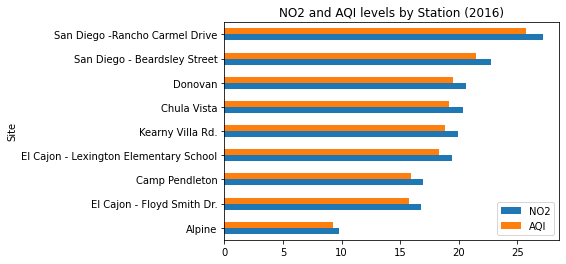

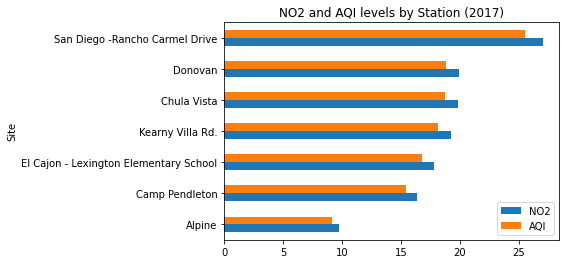

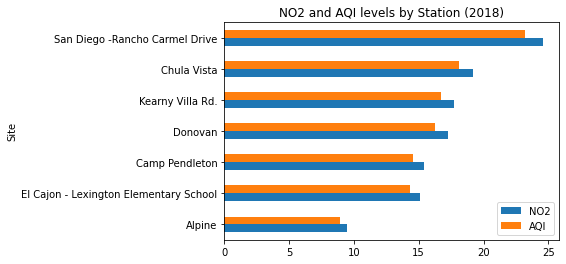

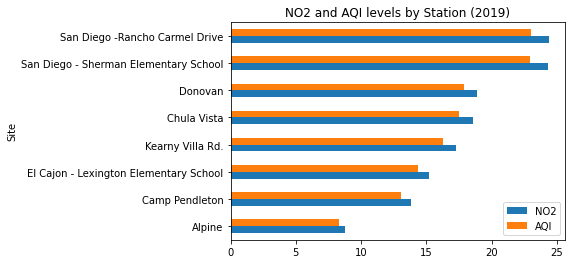

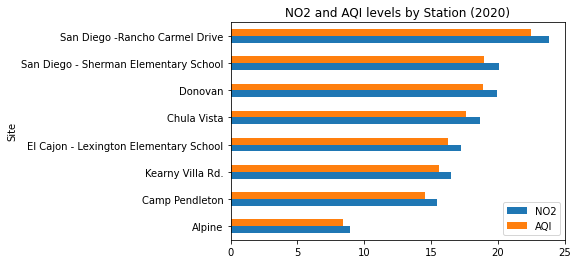

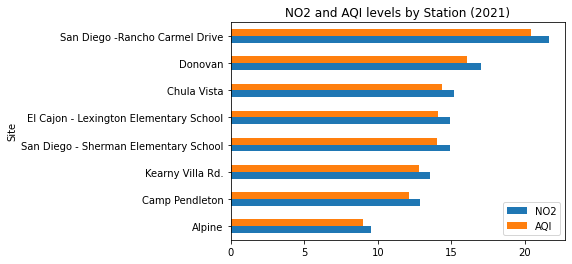

In [20]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

epa2016_df.groupby('Site').mean().sort_values(by = 'NO2', ascending = True).plot(kind = 'barh', y = ['NO2', 'AQI'], title = 'NO2 and AQI levels by Station (2016)')
epa2017_df.groupby('Site').mean().sort_values(by = 'NO2', ascending = True).plot(kind = 'barh', y = ['NO2', 'AQI'], title = 'NO2 and AQI levels by Station (2017)')
epa2018_df.groupby('Site').mean().sort_values(by = 'NO2', ascending = True).plot(kind = 'barh', y = ['NO2', 'AQI'], title = 'NO2 and AQI levels by Station (2018)')
epa2019_df.groupby('Site').mean().sort_values(by = 'NO2', ascending = True).plot(kind = 'barh', y = ['NO2', 'AQI'], title = 'NO2 and AQI levels by Station (2019)')
epa2020_df.groupby('Site').mean().sort_values(by = 'NO2', ascending = True).plot(kind = 'barh', y = ['NO2', 'AQI'], title = 'NO2 and AQI levels by Station (2020)')
epa2021_df.groupby('Site').mean().sort_values(by = 'NO2', ascending = True).plot(kind = 'barh', y = ['NO2', 'AQI'], title = 'NO2 and AQI levels by Station (2021)')

We can see that in total we are dealing with 9 different measuring stations. The data  for NO<sub>2</sub> levels and AQI are collected from the following locations: “Rancho Carmel Drive, Beardsley Street, Donovan, Chula Vista, Kearny Villa, El Cajon - Lexington Elementary School,  Camp Pendleton, and Alpine.

From this cursory analysis. We can see that  the Rancho Carmel Drive measuring station consistently has the highest  measurements for NO2 levels in the atmosphere, while the Alpine  location consistently has the lowest, with the rest of the measurements being clustered more closely together. 

The  Alpine location having the lowest levels of air pollution (low levels of NO<sub>2</sub> levels and  AQI) is likely owing to its location,  which is rather secluded and is in the  mountains at a high elevation where there is very little traffic. In contrast, the Rancho Carmel Drive location has many stores, restaurants, and apartments nearby which likely means that there is a significant amount transportation and movement at this location.

However, these differences in the readings show a consistent pattern from year to year and while the mean values do fluctuate none of the measuring stations show significant fluctuation from year to year, which suggests that there are no obvious outlier years where the data for air quality is far off from other years. 

In our next phase of analysis, we we want to be seeing if there are any obvious differences between the air quality measurements of NO<sub>2</sub> levels and AQI measures after clustering data from pre-covid years and the years where the pandemic hit the hardest and lockdowns in the U.S. began in earnest. The pre-covid years will be 2016 through 2019, and the during covid years will be 2020 - 2021. We then want to create boxplots to see the distribution of NO<sub>2</sub> levels and AQI measure are different on a cursory analysis.

In [23]:
#sns.boxplot(x = epa2020_df['NO2'], y=epa2020_df['Site'])
pre_covid_epa_df = pd.concat([epa2016_df,epa2017_df,epa2018_df,epa2019_df])
during_covid_epa_df = pd.concat([epa2020_df,epa2021_df])

<AxesSubplot:xlabel='NO2', ylabel='Site'>

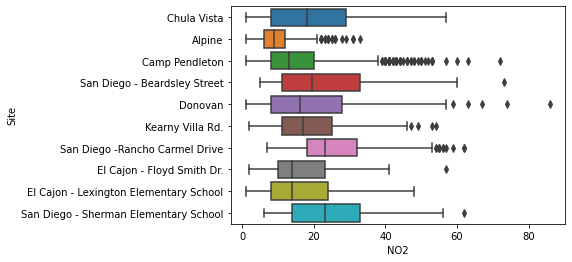

In [27]:
sns.boxplot(x = pre_covid_epa_df['NO2'], y = pre_covid_epa_df['Site'])

<AxesSubplot:xlabel='NO2', ylabel='Site'>

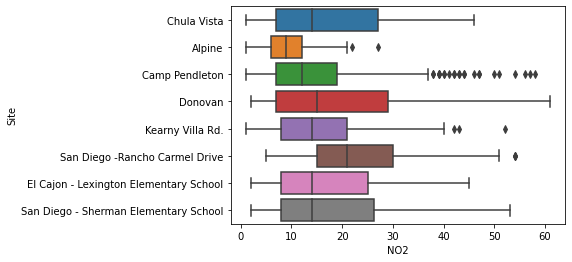

In [28]:
sns.boxplot(x = during_covid_epa_df['NO2'], y = during_covid_epa_df['Site'])

For both the pre-covid years and the during covid years, we can see from the boxplots that the distributions for each individual measuring station is relatively right skewed. For all of the measuring stations, the whisker to the right is significantly longer than the whisker to the left of the box. In addition the the median values for each measuring station is closer the first quartile than the third which again suggests right-skewness for all the measuring stations.

Some other important things to note is that there do seem to be a small number of outliers for some of the measuring stations. In particular, the Camp Pendleton measuring station contains many points that are beyond the "whiskers" of the plot which represents data points that are beyond 1.5 times the interquartile range. We can see that this trend of Campe Pendleton having lots of outliers in NO<sub>2</sub> levels for both the years prior to the COVID-19 pandemic and during it as well. This again, can likely be explained by geographhic features. Camp Pendleton is a military base, and occasional military trainings/weapons testing may lead to a tempoary spike in NO<sub>2</sub> levels. This however, goes beyond the scope of our analysis, the important part is that the outliers do not appear to significantly affect the means as the means or medians of the measuring stations for pre_covid years mostly center around the 18-20 ppb mark, while for the during covid years it appears to center closer to the 13-17ppb mark. 

Essentially, while there are outliers in individual measurements of NO<sub>2</sub>, this does NOT seem to significanlty affect the distributions of NO<sub>2</sub> for each measuring station. The median values of each measuring station is clustered closely enough that we can say that there is no single outlier measuring station, and thus it is safe to aggregate the mean values of all measuring stations within a given year. This means that moving forward with our analysis, we do not need to consider the measuring stations separately, and instead we aggregate their data to get a single daily measurement for  NO<sub>2</sub> per day. 